In [2]:
import matplotlib.pyplot as plt
import glob
import zipfile
import io
import pandas as pd
import numpy as np

In [11]:
mu_list = glob.glob('dmft_results/mu_1.0')

results = pd.DataFrame({'iterations': range(1, 27)})

for mu in mu_list:
    beta_file_list = glob.glob(f'{mu}/beta_*')
    beta_list = []
    order_parameter_list = []
    
    for beta_file in beta_file_list:
        beta = float(beta_file.split('/')[-1].split('_')[1].strip('.zip'))
        beta_list.append(beta)
        results[f'beta_{beta}'] = 0.0
        
        with zipfile.ZipFile(f'{beta_file}', 'r') as beta_zip:
            filenames = [name for name in beta_zip.namelist() if name.endswith(f'.result') and 'dmft' in name]
            for filename in filenames:
                try:
                    iteration = int(filename.split('/')[-1].strip('.result').split('_')[1])
                except IndexError:
                    iteration = 26
            
                with io.TextIOWrapper(beta_zip.open(filename)) as f:
                    ifile = iter(f.readlines())
                    for line in ifile:
                        if line.startswith('# orbital    2    1'):
                            results.at[iteration, f'beta_{beta}'] = float(next(ifile, '').strip())

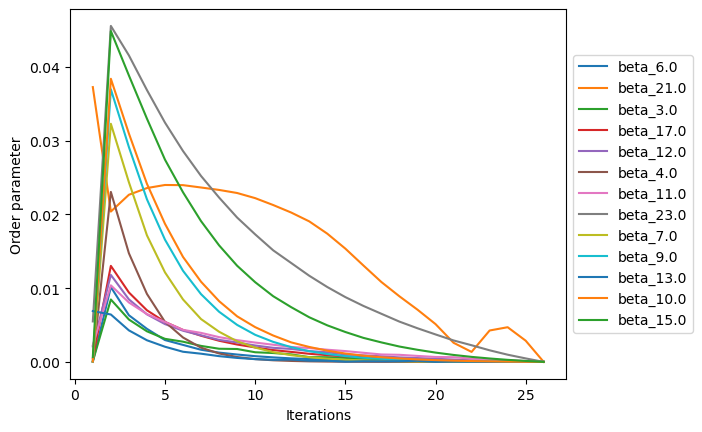

In [12]:
for beta in results.drop(columns='iterations').keys():
    #print(beta)
    plt.plot(results.loc[:, 'iterations'], np.abs(results.loc[:, beta] - results[beta].iloc[-1]), label=f'{beta}')

plt.xlabel('Iterations')
plt.ylabel('Order parameter')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

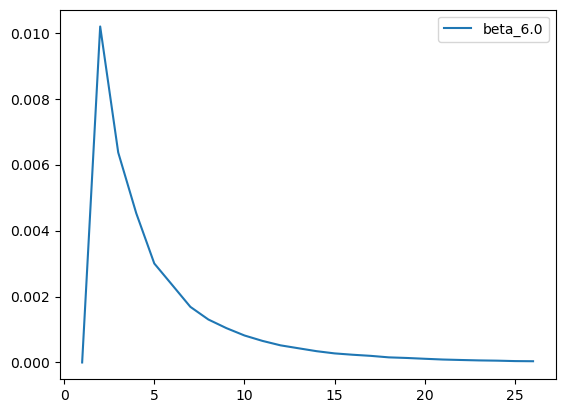

In [14]:
beta = 'beta_6.0'

plt.plot(results.loc[:, 'iterations'], results.loc[:, beta], label=f'{beta}')
plt.legend()

Redo: 15.0, 26.0, 16.0